## Chicago Bikeshare data from 2015

#### Objectives:
join and merge in pandas  
simple visualization

In [1]:
import pandas as pd
from pathlib import Path
import os

In [2]:
os.listdir(Path.joinpath(Path.cwd().parent, 'data'))

['u.item',
 'drinks.csv',
 'superstore.csv',
 'Divvy_Trips_2015_07.csv',
 'imdb_1000.csv',
 'u.data',
 'ufo.csv',
 'sales_info.csv',
 'titanic.csv',
 'Divvy_Stations.csv',
 'boston_housing_data.csv',
 'Divvy_Trips_2015_Q4.csv',
 'bikeshare.csv']

In [3]:
df = pd.read_csv('../data/Divvy_Trips_2015_Q4.csv')
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,8547210,12/31/2015 23:48,12/31/2015 23:51,811,166,348,California Ave & 21st St,442,California Ave & 23rd Pl,Subscriber,Male,1978.0
1,8547209,12/31/2015 23:47,12/31/2015 23:53,3866,334,299,Halsted St & Roscoe St,117,Wilton Ave & Belmont Ave,Subscriber,Female,1991.0
2,8547206,12/31/2015 23:37,12/31/2015 23:43,4325,365,77,Clinton St & Madison St,38,Clark St & Lake St,Subscriber,Male,1992.0
3,8547205,12/31/2015 23:37,1/1/2016 0:02,707,1513,454,Broadway & Granville Ave,303,Broadway & Cornelia Ave,Subscriber,Female,1967.0
4,8547204,12/31/2015 23:36,12/31/2015 23:40,1928,209,141,Clark St & Lincoln Ave,301,Clark St & Schiller St,Subscriber,Male,1995.0


In [4]:
df.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [5]:
# Number of rides by gender
df['gender'].value_counts(dropna=False)

Male      413607
Female    125349
NaN        92409
Name: gender, dtype: int64

In [10]:
# Create some age categories
df['age']='Under 21'
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,date
0,8547210,12/31/2015 23:48,12/31/2015 23:51,811,166,348,California Ave & 21st St,442,California Ave & 23rd Pl,Subscriber,Male,1978.0,Under 21,2015-12-31 23:48:00
1,8547209,12/31/2015 23:47,12/31/2015 23:53,3866,334,299,Halsted St & Roscoe St,117,Wilton Ave & Belmont Ave,Subscriber,Female,1991.0,Under 21,2015-12-31 23:47:00
2,8547206,12/31/2015 23:37,12/31/2015 23:43,4325,365,77,Clinton St & Madison St,38,Clark St & Lake St,Subscriber,Male,1992.0,Under 21,2015-12-31 23:37:00
3,8547205,12/31/2015 23:37,1/1/2016 0:02,707,1513,454,Broadway & Granville Ave,303,Broadway & Cornelia Ave,Subscriber,Female,1967.0,Under 21,2015-12-31 23:37:00
4,8547204,12/31/2015 23:36,12/31/2015 23:40,1928,209,141,Clark St & Lincoln Ave,301,Clark St & Schiller St,Subscriber,Male,1995.0,Under 21,2015-12-31 23:36:00


In [13]:
df['trip_id']==8547210

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
631335    False
631336    False
631337    False
631338    False
631339    False
631340    False
631341    False
631342    False
631343    False
631344    False
631345    False
631346    False
631347    False
631348    False
631349    False
631350    False
631351    False
631352    False
631353    False
631354    False
631355    False
631356    False
631357    False
631358    False
631359    False
631360    False
631361    False
631362    False
631363    False
631364    False
Name: trip_id, Length: 6

In [17]:
df.loc[  df['trip_id']==8547210, 'tripduration'  ]   =167

In [18]:
df.loc[df['birthyear']<1995, 'age']='21-40'


In [19]:
df.loc[df['birthyear']<1975, 'age']='Over 40'
df['age'].value_counts()

21-40       385700
Over 40     146032
Under 21     99633
Name: age, dtype: int64

In [20]:
age_counts = df['age'].value_counts()

In [21]:
# visualize using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

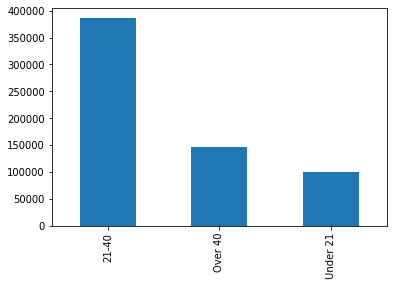

In [23]:
age_counts.plot(kind='bar');

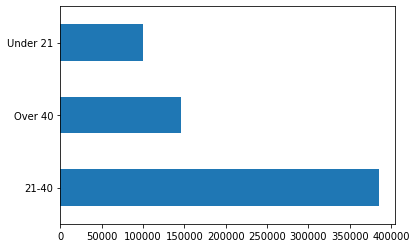

In [25]:
age_counts.plot(kind='barh');

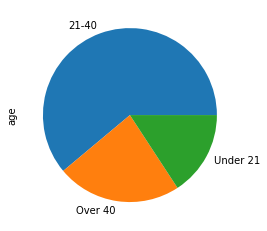

In [26]:
age_counts.plot(kind='pie');

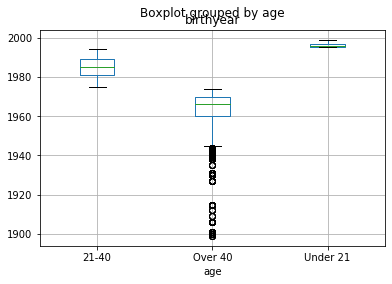

In [29]:
df.boxplot(column='birthyear', by='age' );

In [7]:
# Number of rides by user type
df['usertype'].value_counts(dropna=False)

Subscriber    538989
Customer       92353
Dependent         23
Name: usertype, dtype: int64

In [8]:
# Average trip length
df['tripduration'].mean()

812.9961448607382

In [31]:
df['starttime'].dtype

dtype('O')

In [9]:
# convert date to datetime
df['date']=pd.to_datetime(df['starttime'])
df['date'].dtype

dtype('<M8[ns]')

In [38]:
# create new vars
df['day']=df['date'].dt.day
df['weekday']=df['date'].dt.weekday
df['month']=df['date'].dt.month
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,date,day,weekday,month
0,8547210,12/31/2015 23:48,12/31/2015 23:51,811,167,348,California Ave & 21st St,442,California Ave & 23rd Pl,Subscriber,Male,1978.0,21-40,2015-12-31 23:48:00,31,3,12
1,8547209,12/31/2015 23:47,12/31/2015 23:53,3866,334,299,Halsted St & Roscoe St,117,Wilton Ave & Belmont Ave,Subscriber,Female,1991.0,21-40,2015-12-31 23:47:00,31,3,12
2,8547206,12/31/2015 23:37,12/31/2015 23:43,4325,365,77,Clinton St & Madison St,38,Clark St & Lake St,Subscriber,Male,1992.0,21-40,2015-12-31 23:37:00,31,3,12
3,8547205,12/31/2015 23:37,1/1/2016 0:02,707,1513,454,Broadway & Granville Ave,303,Broadway & Cornelia Ave,Subscriber,Female,1967.0,Over 40,2015-12-31 23:37:00,31,3,12
4,8547204,12/31/2015 23:36,12/31/2015 23:40,1928,209,141,Clark St & Lincoln Ave,301,Clark St & Schiller St,Subscriber,Male,1995.0,Under 21,2015-12-31 23:36:00,31,3,12


## Joins and Merges with outside data

In [39]:
os.listdir(Path.joinpath(Path.cwd().parent, 'data'))

['u.item',
 'drinks.csv',
 'superstore.csv',
 'Divvy_Trips_2015_07.csv',
 'imdb_1000.csv',
 'u.data',
 'ufo.csv',
 'sales_info.csv',
 'titanic.csv',
 'Divvy_Stations.csv',
 'boston_housing_data.csv',
 'Divvy_Trips_2015_Q4.csv',
 'bikeshare.csv']

In [46]:
# Let's join some data
df1=pd.read_csv(Path.joinpath(Path.cwd().parent, 'data','Divvy_Trips_2015_Q4.csv'))
df2=pd.read_csv(Path.joinpath(Path.cwd().parent, 'data','Divvy_Trips_2015_07.csv'))


In [48]:
print(df1.shape)
print(df2.shape)

(631365, 12)
(533711, 12)


In [49]:
print(df1.columns)
print(df2.columns)

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')
Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')


In [66]:
df1_head=df1.head()
df1_head['birthyear']=101
df1_head['newcol']=42
df2_head=df2.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
df1_head=df1_head[sorted(df1_head.columns)]
df1_head.head()

,bikeid,birthyear,from_station_id,from_station_name,gender,newcol,starttime,stoptime,to_station_id,to_station_name,trip_id,tripduration,usertype
0,811,101,348,California Ave & 21st St,Male,42,12/31/2015 23:48,12/31/2015 23:51,442,California Ave & 23rd Pl,8547210,166,Subscriber
1,3866,101,299,Halsted St & Roscoe St,Female,42,12/31/2015 23:47,12/31/2015 23:53,117,Wilton Ave & Belmont Ave,8547209,334,Subscriber
2,4325,101,77,Clinton St & Madison St,Male,42,12/31/2015 23:37,12/31/2015 23:43,38,Clark St & Lake St,8547206,365,Subscriber
3,707,101,454,Broadway & Granville Ave,Female,42,12/31/2015 23:37,1/1/2016 0:02,303,Broadway & Cornelia Ave,8547205,1513,Subscriber
4,1928,101,141,Clark St & Lincoln Ave,Male,42,12/31/2015 23:36,12/31/2015 23:40,301,Clark St & Schiller St,8547204,209,Subscriber


In [75]:
df2_head

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,6611093,7/31/2015 23:59,8/1/2015 0:03,4829,197,239,Western Ave & Leland Ave,242,Damen Ave & Leland Ave,Subscriber,Male,1978.0
1,6611091,7/31/2015 23:59,8/1/2015 0:22,3747,1378,177,Theater on the Lake,312,Clarendon Ave & Gordon Ter,Subscriber,Male,1980.0
2,6611090,7/31/2015 23:59,8/1/2015 0:18,1417,1178,403,Wentworth Ave & 33rd St,150,Fort Dearborn Dr & 31st St,Customer,NaN,NaN
3,6611089,7/31/2015 23:59,8/1/2015 0:03,3829,243,287,Franklin St & Monroe St,38,Clark St & Lake St,Subscriber,Male,1987.0
4,6611088,7/31/2015 23:59,8/1/2015 0:43,3647,2656,305,Western Ave & Division St,506,Spaulding Ave & Armitage Ave,Customer,NaN,NaN


In [76]:
# To join to df's one on top of the other
df3_head=pd.concat([df1_head, df2_head])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [77]:
print(df1_head.shape)
print(df2_head.shape)
print(df3_head.shape)

(5, 13)
(5, 12)
(10, 13)


In [78]:
df3_head

,bikeid,birthyear,from_station_id,from_station_name,gender,newcol,starttime,stoptime,to_station_id,to_station_name,trip_id,tripduration,usertype
0,811,101.0,348,California Ave & 21st St,Male,42.0,12/31/2015 23:48,12/31/2015 23:51,442,California Ave & 23rd Pl,8547210,166,Subscriber
1,3866,101.0,299,Halsted St & Roscoe St,Female,42.0,12/31/2015 23:47,12/31/2015 23:53,117,Wilton Ave & Belmont Ave,8547209,334,Subscriber
2,4325,101.0,77,Clinton St & Madison St,Male,42.0,12/31/2015 23:37,12/31/2015 23:43,38,Clark St & Lake St,8547206,365,Subscriber
3,707,101.0,454,Broadway & Granville Ave,Female,42.0,12/31/2015 23:37,1/1/2016 0:02,303,Broadway & Cornelia Ave,8547205,1513,Subscriber
4,1928,101.0,141,Clark St & Lincoln Ave,Male,42.0,12/31/2015 23:36,12/31/2015 23:40,301,Clark St & Schiller St,8547204,209,Subscriber
0,4829,1978.0,239,Western Ave & Leland Ave,Male,NaN,7/31/2015 23:59,8/1/2015 0:03,242,Damen Ave & Leland Ave,6611093,197,Subscriber
1,3747,1980.0,177,Theater on the Lake,Male,NaN,7/31/2015 23:59,8/1/2015 0:22,312,Clarendon Ave & Gordon Ter,6611091,1378,Subscriber
2,1417,NaN,403,Wentworth Ave & 33rd St,NaN,NaN,7/31/2015 23:59,8/1/2015 0:18,150,Fort Dearborn Dr & 31st St,6611090,1178,Customer
3,3829,1987.0,287,Franklin St & Monroe St,Male,NaN,7/31/2015 23:59,8/1/2015 0:03,38,Clark St & Lake St,6611089,243,Subscriber
4,3647,NaN,305,Western Ave & Division St,NaN,NaN,7/31/2015 23:59,8/1/2015 0:43,506,Spaulding Ave & Armitage Ave,6611088,2656,Customer


## Merge dataframes

In [79]:
os.listdir(Path.joinpath(Path.cwd().parent, 'data'))

['u.item',
 'drinks.csv',
 'superstore.csv',
 'Divvy_Trips_2015_07.csv',
 'imdb_1000.csv',
 'u.data',
 'ufo.csv',
 'sales_info.csv',
 'titanic.csv',
 'Divvy_Stations.csv',
 'boston_housing_data.csv',
 'Divvy_Trips_2015_Q4.csv',
 'bikeshare.csv']

In [80]:
stations=pd.read_csv(Path.joinpath(Path.cwd().parent, 'data', 'Divvy_Stations.csv'))
stations.head()

,id,name,latitude,longitude,dpcapacity,online_date
0,456,2112 W Peterson Ave,41.991178,-87.683593,15,5/12/2015
1,101,63rd St Beach,41.781016,-87.576120,23,4/20/2015
2,109,900 W Harrison St,41.874675,-87.650019,19,8/6/2013
3,21,Aberdeen St & Jackson Blvd,41.877726,-87.654787,15,6/21/2013
4,80,Aberdeen St & Monroe St,41.880456,-87.653929,19,6/26/2013


In [82]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,date,day,weekday,month
0,8547210,12/31/2015 23:48,12/31/2015 23:51,811,167,348,California Ave & 21st St,442,California Ave & 23rd Pl,Subscriber,Male,1978.0,21-40,2015-12-31 23:48:00,31,3,12
1,8547209,12/31/2015 23:47,12/31/2015 23:53,3866,334,299,Halsted St & Roscoe St,117,Wilton Ave & Belmont Ave,Subscriber,Female,1991.0,21-40,2015-12-31 23:47:00,31,3,12
2,8547206,12/31/2015 23:37,12/31/2015 23:43,4325,365,77,Clinton St & Madison St,38,Clark St & Lake St,Subscriber,Male,1992.0,21-40,2015-12-31 23:37:00,31,3,12
3,8547205,12/31/2015 23:37,1/1/2016 0:02,707,1513,454,Broadway & Granville Ave,303,Broadway & Cornelia Ave,Subscriber,Female,1967.0,Over 40,2015-12-31 23:37:00,31,3,12
4,8547204,12/31/2015 23:36,12/31/2015 23:40,1928,209,141,Clark St & Lincoln Ave,301,Clark St & Schiller St,Subscriber,Male,1995.0,Under 21,2015-12-31 23:36:00,31,3,12


In [95]:
df_new=pd.merge(df, stations, left_on='from_station_id', right_on='id', how='outer')

In [96]:
print(df.shape)
print(stations.shape)
print(df_new.shape)

(631365, 17)
(535, 6)
(631425, 23)
